# Global terrorism

## Data dictionary
---
- Year: year in which the incident occurred
- Month: month in which the incident occurred
- Day: day in which the incident occurred
- Region: region where the incident occurred
- Country: country where the incident occurred
- City: city in the country where the incident occurred
- Latitude: latitude
- Longitude: longitude
- GroupName: terrorist group name
- Target: target of attack
- AttackType: type of attack
- TargetType: type of target
- WeaponType: type of weapon used
- Killed: number of people killed
- Wounded: number of people wounded or injured
- Motive: motive of attack
- Success: success of attack (1 = successful, 0 = not successful)

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
gt_df = pd.read_csv('globalterrorism.csv', low_memory=False)

In [3]:
gt_df = gt_df[['iyear',
               'imonth',
               'iday',
               'region_txt',
               'country_txt',
               'city',
               'latitude',
               'longitude',
               'gname',
               'target1',
               'attacktype1_txt',
               'targtype1_txt', 
               'weaptype1_txt',
               'nkill',
               'nwound',
               'motive',
               'success']]

In [4]:
gt_df.rename(columns={'iyear': 'Year',
                      'imonth': 'Month',
                      'iday': 'Day',
                      'region_txt': 'Region',
                      'country_txt': 'Country',
                      'city': 'City',
                      'latitude': 'Latitude',
                      'longitude': 'Longitude',
                      'gname': 'GroupName',
                      'target1': 'Target',
                      'attacktype1_txt': 'AttackType',
                      'targtype1_txt': 'TargetType',
                      'weaptype1_txt': 'WeaponType',
                      'nkill': 'Killed',
                      'nwound': 'Wounded',
                      'motive': 'Motive',
                      'success': 'Success'}, inplace=True)

In [5]:
gt_df

,Year,Month,Day,Region,Country,City,Latitude,Longitude,GroupName,Target,AttackType,TargetType,WeaponType,Killed,Wounded,Motive,Success
0,1970,7,2,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,MANO-D,Julio Guzman,Assassination,Private Citizens & Property,Unknown,1.0,0.0,NaN,1
1,1970,0,0,North America,Mexico,Mexico city,19.371887,-99.086624,23rd of September Communist League,"Nadine Chaval, daughter",Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,NaN,1
2,1970,1,0,Southeast Asia,Philippines,Unknown,15.478598,120.599741,Unknown,Employee,Assassination,Journalists & Media,Unknown,1.0,0.0,NaN,1
3,1970,1,0,Western Europe,Greece,Athens,37.997490,23.762728,Unknown,U.S. Embassy,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,NaN,1
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,Unknown,U.S. Consulate,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Somalia,Ceelka Geelow,2.359673,45.385034,Al-Shabaab,Checkpoint,Armed Assault,Military,Firearms,1.0,2.0,NaN,1
181687,2017,12,31,Middle East & North Africa,Syria,Jableh,35.407278,35.942679,Muslim extremists,Hmeymim Air Base,Bombing/Explosion,Military,Explosives,2.0,7.0,NaN,1
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,Bangsamoro Islamic Freedom Movement (BIFM),Houses,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,0.0,NaN,1
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,Unknown,Office,Bombing/Explosion,Government (General),Explosives,0.0,0.0,NaN,0


In [6]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Region      181691 non-null  object 
 4   Country     181691 non-null  object 
 5   City        181257 non-null  object 
 6   Latitude    177135 non-null  float64
 7   Longitude   177134 non-null  float64
 8   GroupName   181691 non-null  object 
 9   Target      181055 non-null  object 
 10  AttackType  181691 non-null  object 
 11  TargetType  181691 non-null  object 
 12  WeaponType  181691 non-null  object 
 13  Killed      171378 non-null  float64
 14  Wounded     165380 non-null  float64
 15  Motive      50561 non-null   object 
 16  Success     181691 non-null  int64  
dtypes: float64(4), int64(4), object(9)
memory usage: 23.6+ MB


In [7]:
gt_df[gt_df.columns.values.tolist()].isnull().sum()

Year               0
Month              0
Day                0
Region             0
Country            0
City             434
Latitude        4556
Longitude       4557
GroupName          0
Target           636
AttackType         0
TargetType         0
WeaponType         0
Killed         10313
Wounded        16311
Motive        131130
Success            0
dtype: int64

- Missing values in City, Latitude, Longitude, Target, Killed, Wounded, and Motive

In [8]:
print(f'From {gt_df.Year.min()} to {gt_df.Year.max()}, there have {gt_df.index.nunique()} recorded terrorist attacks. In {gt_df.Country.nunique()} countries, these lead to {int(gt_df.Killed.sum())} deaths and {int(gt_df.Wounded.sum())} wounded.')

From 1970 to 2017, there have 181691 recorded terrorist attacks. In 205 countries, these lead to 411868 deaths and 523869 wounded.


Text(0, 0.5, 'Number of attacks')

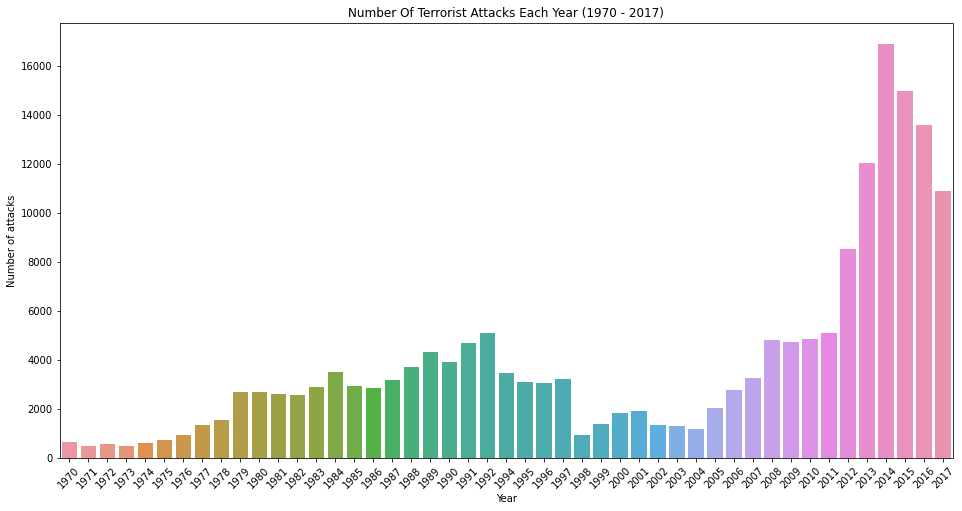

In [9]:
plt.subplots(figsize=(16,8))
plt.title('Number Of Terrorist Attacks Each Year (1970 - 2017)')
plt.xticks(rotation=45)
sns.countplot(data=gt_df, x='Year')
plt.ylabel('Number of attacks')

<AxesSubplot:title={'center':'Number of terrorist attacks in each region'}, xlabel='Regions', ylabel='Attacks'>

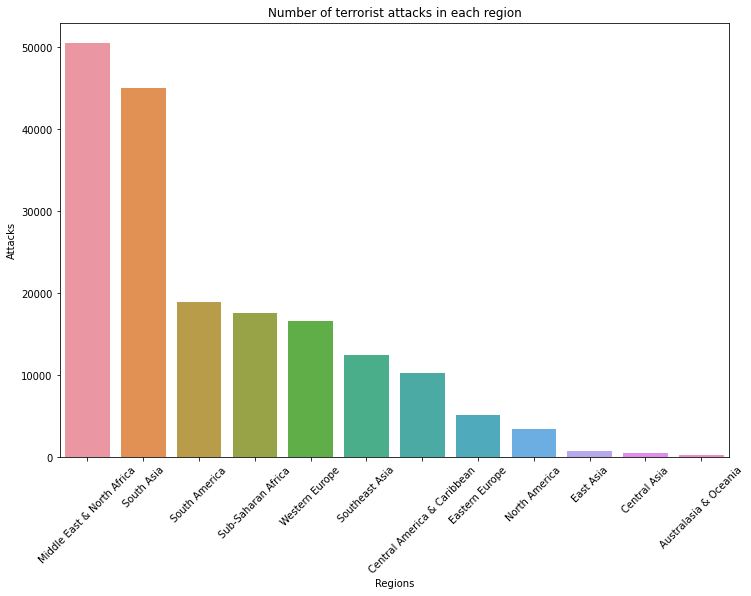

In [10]:
plt.subplots(figsize=(12,8))
regionAttacks = gt_df.Region.value_counts().to_frame().reset_index()
regionAttacks.columns = ['Regions', 'Attacks']
plt.title('Number of terrorist attacks in each region')
plt.xticks(rotation=45)
sns.barplot(x=regionAttacks.Regions, y=regionAttacks.Attacks)

<AxesSubplot:title={'center':'20 countries with most number of terrorist attacks'}, xlabel='Countries', ylabel='Attacks'>

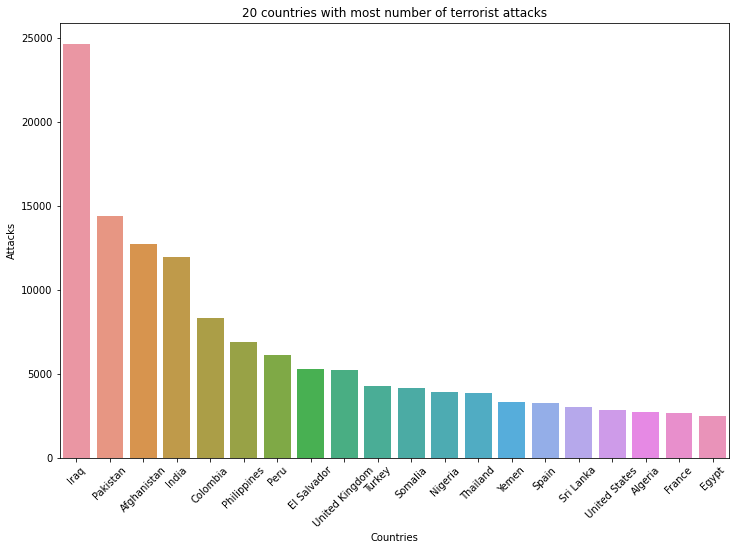

In [11]:
plt.subplots(figsize=(12, 8))
countryAttacks = gt_df.Country.value_counts()[:20].reset_index()
countryAttacks.columns = ['Countries', 'Attacks']
plt.title('20 countries with most number of terrorist attacks')
plt.xticks(rotation=45)
sns.barplot(x=countryAttacks.Countries, y=countryAttacks.Attacks)

<AxesSubplot:title={'center':'20 countries with least number of terrorist attacks'}, xlabel='Countries', ylabel='Attacks'>

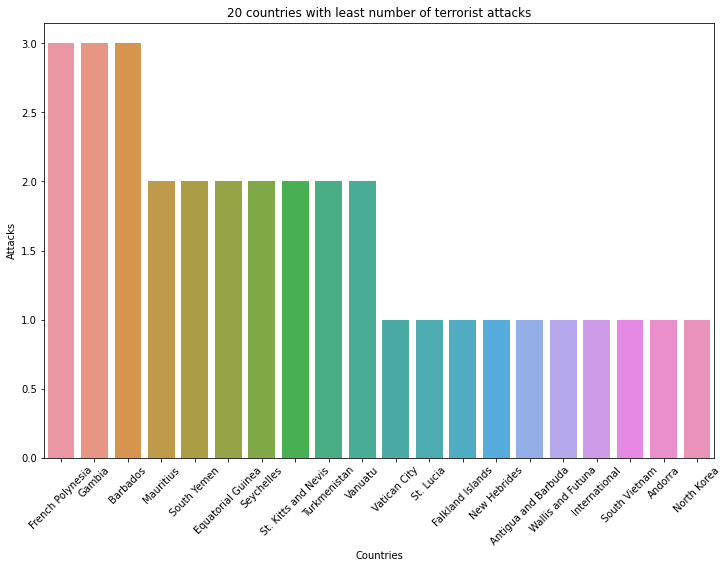

In [12]:
plt.subplots(figsize=(12, 8))
countryAttacks = gt_df.Country.value_counts()[-20:].reset_index()
countryAttacks.columns = ['Countries', 'Attacks']
plt.title('20 countries with least number of terrorist attacks')
plt.xticks(rotation=45)
sns.barplot(x=countryAttacks.Countries, y=countryAttacks.Attacks)

<AxesSubplot:title={'center':'20 cities with most number of terrorist attacks'}, xlabel='Cities', ylabel='Attacks'>

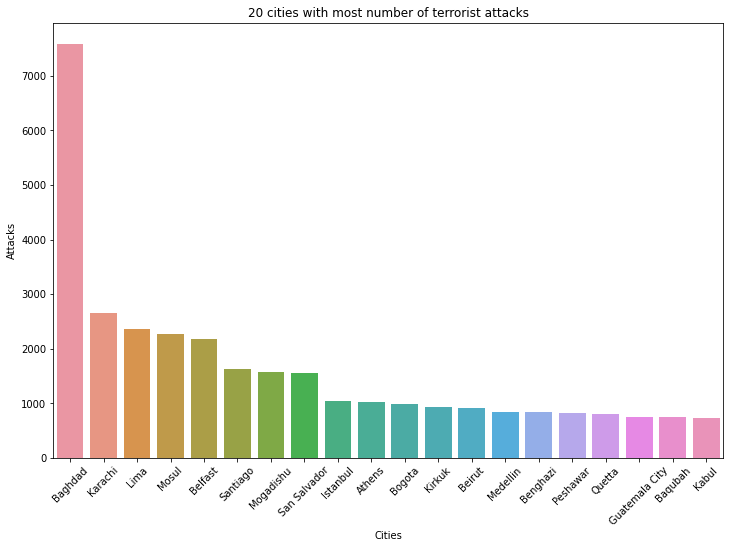

In [13]:
plt.subplots(figsize=(12, 8))
city = gt_df.City.value_counts()[1:21].reset_index()
city.columns = ['Cities', 'Attacks']
plt.title('20 cities with most number of terrorist attacks')
plt.xticks(rotation=45)
sns.barplot(x=city.Cities, y=city.Attacks)

<AxesSubplot:title={'center':'20 groups with most number of terrorist attacks'}, xlabel='Groups', ylabel='Attacks'>

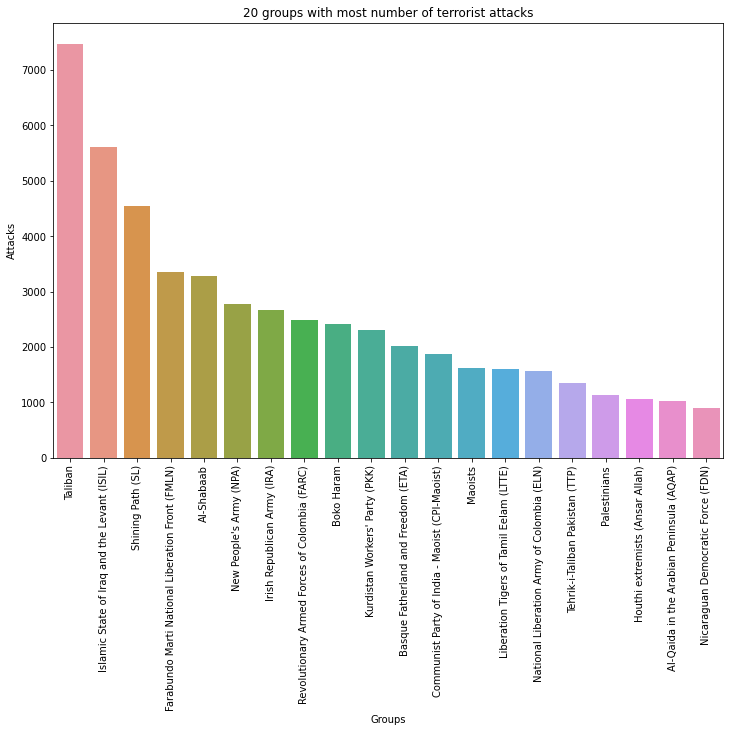

In [14]:
plt.subplots(figsize=(12, 8))
groups = gt_df.GroupName.value_counts()[1:21].reset_index()
groups.columns = ['Groups', 'Attacks']
plt.title('20 groups with most number of terrorist attacks')
plt.xticks(rotation=90)
sns.barplot(x=groups.Groups, y=groups.Attacks)

<AxesSubplot:title={'center':'20 most targeted groups'}, xlabel='Target', ylabel='Attacks'>

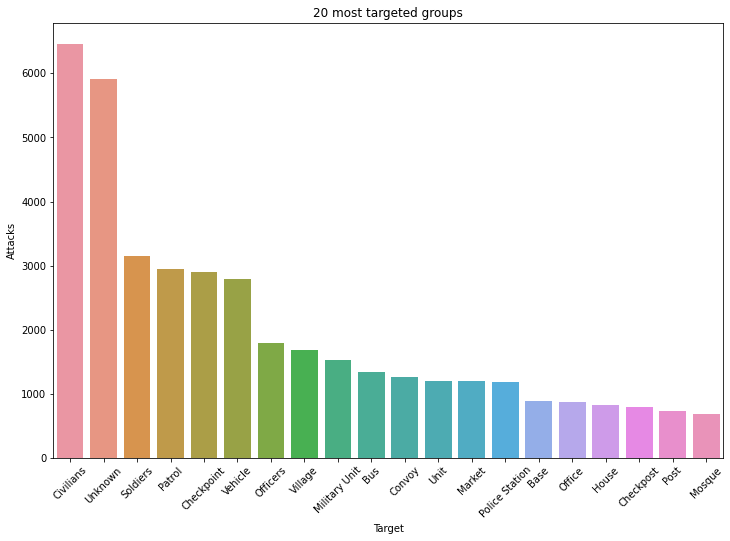

In [15]:
plt.subplots(figsize=(12, 8))
Target = gt_df.Target.value_counts()[0:20].reset_index()
Target.columns = ['Target', 'Attacks']
plt.title('20 most targeted groups')
plt.xticks(rotation=45)
sns.barplot(x=Target.Target, y=Target.Attacks)

<Figure size 864x576 with 0 Axes>

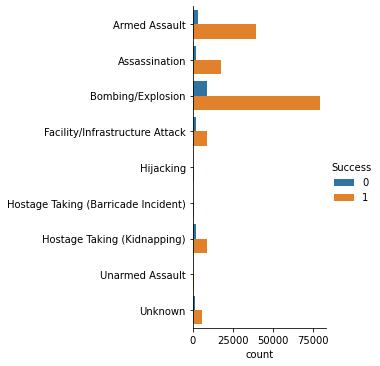

In [16]:
plt.figure(figsize=(12, 8))
sns.catplot(y=sorted(gt_df.AttackType), data=gt_df, kind='count', hue='Success')

In [17]:
motives = gt_df['Motive'].value_counts(normalize=True).to_frame().rename(columns={'Motive':'Ratio'})
motives['Motive'] = motives.index
motives.reset_index(inplace=True, drop=True)
display(motives[['Motive','Ratio']].head(10))

,Motive,Ratio
0,Unknown,0.294476
1,The specific motive for the attack is unknown.,0.285398
2,"The specific motive is unknown; however, sourc...",0.005874
3,The specific motive for the attack is unknown..,0.002927
4,The specific motive for the attack is unknown ...,0.002848
5,The specific motive for the attack is unknown,0.001444
6,Part of a campaign by Islamic extremists to de...,0.001305
7,The specific motive for the attack was political.,0.001127
8,"The specific motive is unknown; however, sourc...",0.001028
9,The attack was carried out because the victim ...,0.000989


In [18]:
gt_df.corr()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Success
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273,-0.082963
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938,-0.002845
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268,-0.011802
Latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988,-0.073715
Longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223,-0.000858
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375,0.053115
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000,0.025804
Success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,0.053115,0.025804,1.000000


## Insights
---
- Most numbers of terrorist attacks occurred in the year 2014.
- Middle East, North Africa, and South Asia have sufferred the most number of attacks.
- Iraq is the least safe country, while St. Lucia and Vatican City are some of the safest countries.
- Baghdad is the least safe city for living in.
- Bombing/Explosion is the most common type of attack amongst terrorist.
- Taliban is the most dangerous terrorist group.
- Civilians are the most targeted group by terrorists. 
- 72% of the times, the motive of the attack is missing. About 30% of the remaining motives are also unknown.